# Machine Translation (Hindi to English)

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Here we import different libraries

In [28]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)})
import math
import nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from autocorrect import spell

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ModuleNotFoundError: ignored

## Data Analysis

In [10]:
data = pd.read_csv("hindi_english_parallel.csv")
data.tail(20)

,hindi,english
59790,पारदर्शी क्षेत्रों हेतु रंग,Color for Transparent Areas
59791,पृष्ठ भूमि जैसे (_ b),As _ background
59792,छवि दृश्य,Image View
59793,छवि ज़ूम,Image Zoom
59794,स्क्रीन में फिट बैठने के लिए बिंब फैलायें (_ x),E _ xpand images to fit screen
59795,अनुक्रम,Sequence
59796,इसके बाद विंब स्विच करें (_ S):,_ Switch image after:
59797,सेकण्ड्स,seconds
59798,लूप अनुक्रम (_ L),_ Loop sequence
59799,स्लाइड-शो,Slideshow


In [12]:
print(data.isna().sum())
# data.drop(data.index[1561833:1561840], inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(columns=["index"],inplace=True)
data.shape

for i in range(50000,50005):
    print('Hindi Sample %5d: '%(i) +data['hindi'][i])
    print('English Sample %5d: '%(i) +data['english'][i])
    print("\n")

def make_lowercase(data,column):
    data[column] = data[column].apply( lambda text: text.lower() )
    return data
data = make_lowercase(data,column="english")
# data = make_lowercase(data,column="hindi")


def remove_puntuations(data,column):
    special_char = set(string.punctuation+'।') # Set of all special characters
    # Remove all the special characters
    data[column] = data[column].apply(lambda line: ''.join(word for word in line if word not in special_char))
    data[column] = data[column].apply(lambda line: re.sub("'", '', line))
    return data

data = remove_puntuations(data,column='english')
data = remove_puntuations(data,column='hindi')




hindi      3
english    1
dtype: int64
Hindi Sample 50000: LDAP SASL अंतःक्रियाChallenge
English Sample 50000: LDAP SASL Interaction


Hindi Sample 50001: Challenge: 
English Sample 50001: Challenge:


Hindi Sample 50002: अंतःक्रिया करें
English Sample 50002: Interact


Hindi Sample 50003: ताजा करना
English Sample 50003: Refreshing


Hindi Sample 50004: सर्वर आरंभ नहीं कर सका
English Sample 50004: Could not initialize server




In [15]:
index_to_drop = []
for i in tqdm(list(data.index)):
    eng_text = data['english'][i].split()
    hin_text = data['hindi'][i].split()
    count_of_hindi = sum([ re.search('[a-zA-Z0-9]', word) == None for word in eng_text])
    count_of_alphabets = sum([ not(re.search('[a-zA-Z]', word)) == None for word in hin_text])

    if count_of_hindi>=1 or count_of_alphabets>=2:
        index_to_drop.append(i)
        
data.drop(index=index_to_drop,inplace=True)
data.head(20)

100%|██████████| 59806/59806 [00:01<00:00, 58022.90it/s]


,hindi,english
0,अपने अनुप्रयोग को पहुंचनीयता व्यायाम का लाभ दें,give your application an accessibility workout
1,एक्सेर्साइसर पहुंचनीयता अन्वेषक,accerciser accessibility explorer
2,निचले पटल के लिए डिफोल्ट प्लगइन खाका,the default plugin layout for the bottom panel
3,ऊपरी पटल के लिए डिफोल्ट प्लगइन खाका,the default plugin layout for the top panel
4,उन प्लगइनों की सूची जिन्हें डिफोल्ट रूप से निष...,a list of plugins that are disabled by default
5,अवधि को हाइलाइट रकें,highlight duration
6,पहुंचनीय आसंधि नोड को चुनते समय हाइलाइट बक्से ...,the duration of the highlight box when selecti...
7,सीमांत बोर्डर के रंग को हाइलाइट करें,highlight border color
8,हाइलाइट किए गए सीमांत का रंग और अपारदर्शिता,the color and opacity of the highlight border
9,भराई के रंग को हाइलाइट करें,highlight fill color


<Axes: xlabel='eng_length', ylabel='Percent'>

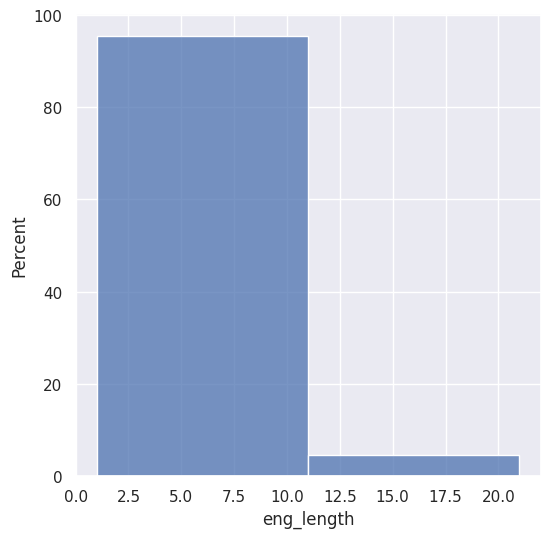

In [30]:
data['eng_length'] = data['english'].apply( lambda text: len(text.split()))
data['hin_length'] = data['hindi'].apply( lambda text: len(text.split()))

data.drop(index=data[data['hin_length'] == 0].index,inplace=True)
data.drop(index=data[data['eng_length'] == 0].index,inplace=True)


sns.histplot(data=data, x="eng_length",binwidth=10,stat="percent")


<Axes: xlabel='hin_length', ylabel='Percent'>

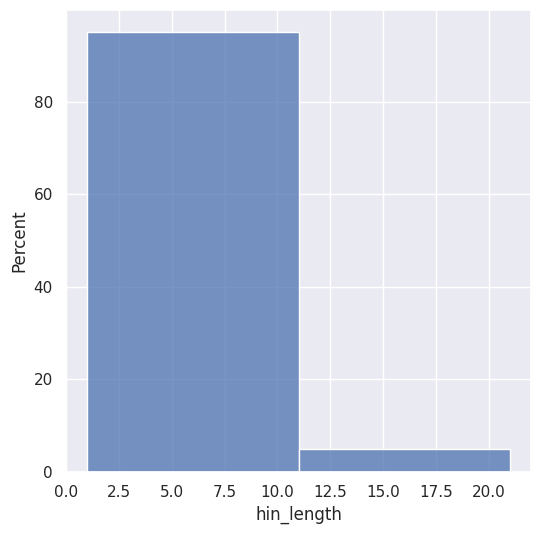

In [31]:
sns.histplot(data=data, x="hin_length",binwidth=10,stat="percent")

In [19]:
maximum_length_of_sentence = 20
print('Count of Large Length Hindi Sentences : ',sum(data['hin_length'] > maximum_length_of_sentence))
print('Percentage of High Length Hindi Sentences : ',sum(data['hin_length'] > maximum_length_of_sentence)/data.shape[0])
print("-----------------------------")
print('Count of Large Length English Sentences : ',sum(data['eng_length'] > maximum_length_of_sentence))
print('Percentage of High Length English Sentences : ',sum(data['eng_length'] > maximum_length_of_sentence)/data.shape[0])

Count of Large Length Hindi Sentences :  545
Percentage of High Length Hindi Sentences :  0.009797224419357159
-----------------------------
Count of Large Length English Sentences :  512
Percentage of High Length English Sentences :  0.009203997986625441


In [20]:
data.drop(index=data[data['hin_length'] > maximum_length_of_sentence].index,inplace=True)
data.drop(index=data[data['eng_length'] > maximum_length_of_sentence].index,inplace=True)
data.reset_index(drop=True,inplace=True)
data.shape

(54956, 4)

<Axes: xlabel='eng_length', ylabel='Percent'>

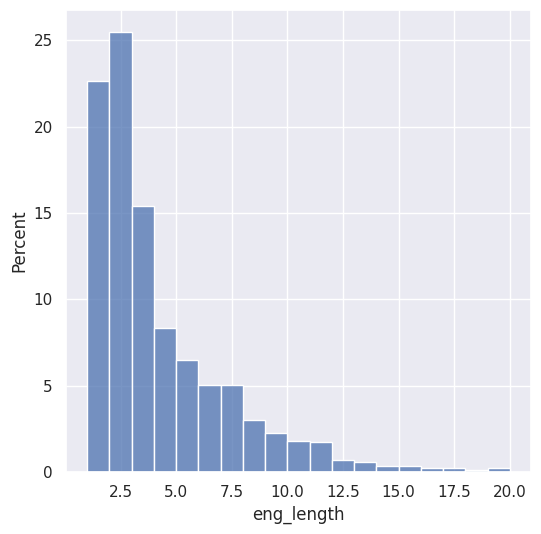

In [32]:
sns.histplot(data=data, x="eng_length",binwidth=1,stat="percent")

<Axes: xlabel='hin_length', ylabel='Percent'>

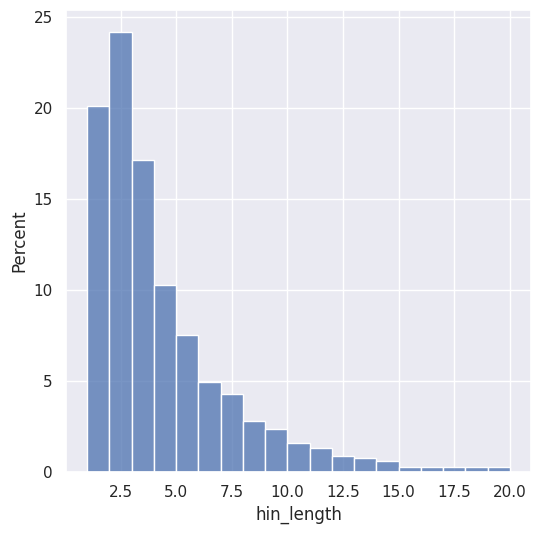

In [33]:
sns.histplot(data=data, x="hin_length",binwidth=1,stat="percent")

In [ ]:
import codecs

with codecs.open('DATASET.txt', encoding='utf-8') as f:
    data = f.read()

In [ ]:
row=data.split("\n")
regex = re.compile('[%s]' % re.escape(string.punctuation))

## Here we are doing Spell Correction, Removing punctuation, Preparing word to vector dictionary

In [ ]:

word_eng_dic={}
word_hin_dic={}
for i in row:
    
    #if(count>100):
        #break
        
    s=i.split("\t")
    if len(s) == 2:

      
        

        s1=regex.sub(' ',s[0])
        words= word_tokenize(s1) 
        
        for word_tokens in words:
            w=word_tokens.lower()
            w=spell(w)
            word_eng_dic[w]=[]
            
            
        s1=regex.sub(' ',s[1])

        words= word_tokenize(s1) 
        
        for word_tokens in words:
            
            if ord('।') == ord(word_tokens[-1]):
                print(word_tokens)
                
                word_hin_dic[word_tokens[:-1]]=[]
                print(word_tokens[:-1])
            
            else:
                word_hin_dic[word_tokens]=[]
        
        
        



Streaming output truncated to the last 5000 lines.
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
है।
है
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell 

In [ ]:
len(word_hin_dic)

2854

## Here we are reading 50 dim glove embeddings from file for English vocab

In [ ]:
count=0
cnt=0
with open('glove.6B.50d.txt','r',encoding="utf8") as file: 
  
    for index, line in enumerate(file): 
        #print(line)
        values = line.split()
        word=values[0]
        word_weights = np.asarray(values[1:], dtype=np.float32)
        if word in word_eng_dic.keys():
            print("exist ",cnt)
            cnt=cnt+1
            word_eng_dic[word]= word_weights
            
        #print(count," ",word)
        count=count+1
        #print(word)
        #print(word_weights)
        
    print(count," ",cnt)
        

exist  0
exist  1
exist  2
exist  3
exist  4
exist  5
exist  6
exist  7
exist  8
exist  9
exist  10
exist  11
exist  12
exist  13
exist  14
exist  15
exist  16
exist  17
exist  18
exist  19
exist  20
exist  21
exist  22
exist  23
exist  24
exist  25
exist  26
exist  27
exist  28
exist  29
exist  30
exist  31
exist  32
exist  33
exist  34
exist  35
exist  36
exist  37
exist  38
exist  39
exist  40
exist  41
exist  42
exist  43
exist  44
exist  45
exist  46
exist  47
exist  48
exist  49
exist  50
exist  51
exist  52
exist  53
exist  54
exist  55
exist  56
exist  57
exist  58
exist  59
exist  60
exist  61
exist  62
exist  63
exist  64
exist  65
exist  66
exist  67
exist  68
exist  69
exist  70
exist  71
exist  72
exist  73
exist  74
exist  75
exist  76
exist  77
exist  78
exist  79
exist  80
exist  81
exist  82
exist  83
exist  84
exist  85
exist  86
exist  87
exist  88
exist  89
exist  90
exist  91
exist  92
exist  93
exist  94
exist  95
exist  96
exist  97
exist  98
exist  99
exist  100

## Here we are finding words not in embedding file

In [ ]:
mispell=[]
cnt=0
for i in word_eng_dic.keys():
    try:
        a=word_eng_dic[i].shape
    except:
        print(i)
        mispell.append(i)
        cnt=cnt+1
print(cnt)

wow
hello
cheers
awesome
goodbye
forgot
ll
excuse
fantastic
laughed
bored
swim
hungry
shout
cake
math
easter
starving
unbelievable
bloom
aloud
bent
beard
atheist
wash
kidding
congratulations
absurd
reads
rude
cooked
gaseous
assaulted
kites
didn
crying
isn
startled
potatoes
oranges
betrayed
hurry
nests
deceive
employs
maid
traitor
cried
sleepy
headache
rotates
happiness
pie
nuts
breached
yours
leased
sailed
happily
annoys
batter
crow
pumpkin
vase
gym
lonely
eaten
ve
ink
skies
forgive
pencil
lent
stranger
vomiting
stomachache
kyoto
consciousness
joke
allergic
glasses
ringing
1865
specialty
haunted
ablaze
sheets
damp
pipe
hers
silk
galileo
rumor
hens
rung
stairs
shooter
sixty
dear
beautifully
grateful
dove
servant
biology
swollen
hated
stubborn
wherever
shouted
disturbing
rested
nonsense
elevator
reap
sow
rabbit
ears
temper
slap
earns
robbed
tore
understands
pity
cage
wasn
longing
absent
stomach
wears
gentle
weird
ceased
doesn
sooner
glad
tame
scattering
lend
spoil
catches
couldn
smelling

## Here we are Integer Encoding for Hindi vocab

In [ ]:
from sklearn.preprocessing import LabelEncoder

values=list(word_hin_dic.keys())
values.append("#")
label_encoder_hin = LabelEncoder()
integer_encoded = label_encoder_hin.fit_transform(values)
print(integer_encoded)
# binary encode

integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)


[2435 1755  231 ... 1685 1309    1]


## Here we are assigning emb vectors for english vocab, Integer encoding for hindi vocab

## Computing Hindi and English sentence length

In [ ]:
emb=50
engs=[]
trgseqlen=[]
hins=[]
srcseqlen=[]
maxeword=30
maxhword=30
for i in row:
    
    #if(count>100):
        #break
        
    s=i.split("\t")
    if len(s) == 2:

        s1=regex.sub(' ',s[0])
        

        words= word_tokenize(s1) 
        
        eng=[]
        
        for word_tokens in words:
            w=word_tokens.lower()
            w=spell(w)

            if w in mispell:
                eng.append(word_eng_dic['a'].tolist())
            else:
                eng.append(word_eng_dic[w].tolist())
                
        b=maxeword-len(words)
        trgseqlen.append(len(words))
        for t in range(b):
            eng.append(np.zeros((emb,)).tolist())
            
        print("eng",len(eng))
        
        engs.append(eng)
        
        
        
        s1=regex.sub(' ',s[1])
        #print(s1)

        words= word_tokenize(s1) 
        
        
        
        hin=[]
        
        for word_tokens in words:
            p=word_tokens
            if ord('।') == ord(word_tokens[-1]):
                print(word_tokens)
                
                p=word_tokens[:-1]
                print(word_tokens[:-1])
            
            
                
                
            hin.append(p)
            
        b=maxhword-len(words)
        print(b,len(words))
        
        srcseqlen.append(len(words))
        for t in range(0,b):
            hin.append("#")
            
        #print("hin=",len(hin))
        print(hin)
        q=label_encoder_hin.transform(hin)
        print(q)
        #print("length",len(q))
        hins.append(q.tolist())
        
        
eng_data=np.array(engs)
trgseqlen=np.array(trgseqlen)
hin_data=np.array(hins)
srcseqlen=np.array(srcseqlen)

Streaming output truncated to the last 5000 lines.
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
eng 30
डाँटा।
डाँटा
20 10
['उसने', 'मुझे', 'चिट्ठी', 'का', 'जवाब', 'न', 'देने', 'के', 'लिए', 'डाँटा', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#', '#']
[ 301 2141  829  451  928 1371 1331  512 2353 1102    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1]
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autoc

## For mean square loss computation

In [ ]:
print(eng_data.shape,trgseqlen.shape,hin_data.shape,srcseqlen.shape)
msl1=[]

for i in trgseqlen:
    
    msl1.append(np.concatenate((np.ones((i+1,)),np.zeros((maxhword-i-1,))),axis=0).tolist())
    
msl1=np.array(msl1).reshape(2867,30,1)*np.ones((2867,30,50))

print(msl1.shape)


(2867, 30, 50) (2867,) (2867, 30) (2867,)
(2867, 30, 50)


## Making tensorflow computation graph for Seq to Seq with attention mechanism

In [ ]:
import tensorflow as tf


src_emb_size=50
trg_emb_size=50

num_units=30
attention_a=5
#src_seq_len=30
#trg_seq_len=30
epochs=1
max_time=30

maxeword=30
maxhword=30

dtypei=tf.int64
dtypef=tf.float64


g=tf.Graph()
with g.as_default():

    
    with tf.compat.v1.variable_scope("placeholders"):
        
        inputs=tf.compat.v1.placeholder(dtypei,[None,maxhword])
        labels=tf.compat.v1.placeholder(dtypef,[None,maxeword,trg_emb_size])
        src_seq_length=tf.compat.v1.placeholder(shape=(None,), dtype=dtypei)
        trg_seq_length=tf.compat.v1.placeholder(shape=(None,), dtype=tf.int32)
        initialize=tf.compat.v1.placeholder(dtypef,[None,trg_emb_size+num_units])
        msl=tf.compat.v1.placeholder(shape=(None,maxeword,trg_emb_size),dtype=dtypef)


    
    
    with tf.compat.v1.variable_scope("seq_to_seq"):

        
        Ua=tf.compat.v1.Variable(tf.compat.v1.truncated_normal(shape=(attention_a,),dtype=dtypef))
        ba=tf.compat.v1.Variable(tf.zeros(shape=(attention_a,),dtype=dtypef))
        Va=tf.compat.v1.Variable(tf.compat.v1.truncated_normal(shape=(2*num_units,attention_a),dtype=dtypef))
        Ma=tf.compat.v1.Variable(tf.compat.v1.truncated_normal(shape=(num_units,num_units,attention_a),dtype=dtypef))


        

    #encoder_word_embeddings = tf.Variable(tf.truncated_normal(shape=(src_vocab_size,src_emb_size)))
    #embedded_word_ids = tf.nn.embedding_lookup(encoder_word_embeddings, inputs)

        with tf.compat.v1.variable_scope("encoder"):
            
            word_embeddings = tf.compat.v1.Variable(tf.compat.v1.truncated_normal(shape=(len(word_hin_dic), src_emb_size),dtype=dtypef))
            embedded_word_ids = tf.nn.embedding_lookup(word_embeddings, inputs)
    
            print(word_embeddings)
    

            encoder_lstm_cell=tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units)
            print(encoder_lstm_cell)

            encoder_lstm_net=tf.compat.v1.nn.dynamic_rnn(inputs=embedded_word_ids,cell=encoder_lstm_cell,dtype=dtypef,sequence_length=src_seq_length)

            hidden_vector,encoder_final_state=encoder_lstm_net

            #hidden_vector=tf.multiply(tf.ones((1,max_time,num_units)),hidden_vector)
            print("hidden_vector",hidden_vector)

            lab=2




        #batchSize=tf.unstack(tf.shape(inputs))[0]
        #print(batchSize)
        #batchSize=tf.constant(batchSize)

        dense_w=tf.compat.v1.Variable(tf.compat.v1.truncated_normal(shape=(num_units,trg_emb_size),dtype=dtypef))
        dense_b=tf.Variable(tf.zeros(shape=(trg_emb_size,),dtype=dtypef))

        def loop_fn(time, cell_output, cell_state, loop_state):



            if cell_output is None:  # time == 0
                next_cell_state = encoder_final_state#cell.zero_state(batch_size, tf.float32)
                
                inp=initialize

            else:
                #print("a=",cell_output)
                next_cell_state = cell_state
                #print("else",next_cell_state)
              
                inp=tf.nn.sigmoid(tf.add(tf.matmul(cell_output,dense_w),dense_b))
                #print("temp",temp)


                print("cell_output",cell_output)

               
                """"
                temp=tf.reshape(cell_output,(batch_size,1,num_units))

                temp=tf.multiply(hidden_vector,temp)

                alpha=tf.nn.softmax(tf.reshape(tf.reduce_sum(temp,axis=2),(batch_size,maxtime,1)),axis=1)
                print(alpha)
                """
                
                

                batch,_=tf.unstack(tf.shape(cell_output))
                
                with tf.compat.v1.variable_scope("attention"):
                
                    ft=tf.multiply(tf.tensordot(hidden_vector,Ma,axes=[[2],[0]]), tf.reshape(cell_output,(batch,1,num_units,1)))
                    ft=tf.reduce_sum(ft,axis=2)

                    print("ft",ft)

                    #print("ones",tf.concat((tf.multiply(tf.ones((1,max_time,num_units),dtype=tf.float32),tf.reshape(cell_output,(batch,1,num_units))),hidden_vector),axis=2))
                    st=tf.concat((tf.multiply(tf.ones((1,maxhword,num_units),dtype=dtypef),tf.reshape(cell_output,(batch,1,num_units))),hidden_vector),axis=2)
                    print("st",st,tf.reshape(Va,(2*num_units,attention_a,1)))
                    print(tf.tensordot(st,tf.reshape(Va,(2*num_units,attention_a,1)),axes=[[2],[0]]))
                    #st=tf.concat((tf.multiply(tf.ones((1,max_time,num_units),dtype=tf.float32),tf.reshape(cell_output,(batch,1,num_units))),hidden_vector),axis=2)
                    st=tf.reshape(tf.tensordot(st,tf.reshape(Va,(2*num_units,attention_a,1)),axes=[[2],[0]]),(batch,maxhword,attention_a))

                    print("st",st)

                    tt=tf.reshape(ba,(1,1,attention_a))

                    print("tt",tt)

                    alpha=tf.nn.softmax(tf.reduce_sum(tf.multiply(tf.reshape(Ua,(1,1,attention_a)),tf.nn.tanh(tf.add(tf.add(ft,st),tt))),axis=2))
                    print("a",alpha)
                    alpha=tf.reshape(alpha,(batch,maxhword,1))

                    print("alpha",alpha)

                    temp=tf.multiply(alpha,hidden_vector)

                    ctx=tf.reduce_sum(temp,axis=1)

                inp=tf.concat([inp,ctx],axis=1)

                print("inp",inp)






            emit_output=cell_output
                #inp=tf.as.dese(cell_output,20,activation='softmax',name="dense"+(str)(time))
                #print("else ",inputs)





            print("emit",emit_output)
            elements_finished = (time >= trg_seq_length)
            print("elements_finished",elements_finished)
            finished = tf.reduce_all(elements_finished)
            #inp=tf.layers.dense(cell_output,20,activation='softmax')
            
            next_input=inp
            """next_input = tf.cond(
              finished,
              lambda: initialize,
              lambda: inp)"""
            next_loop_state = None
            print(next_input)
            return (elements_finished, next_input, next_cell_state,
                  emit_output, next_loop_state)


        with tf.compat.v1.variable_scope("decoder"):
            
            decoder_lstm_cell =tf.compat.v1.nn.rnn_cell.LSTMCell(num_units)
            decoder_lstm_net=tf.compat.v1.nn.raw_rnn(decoder_lstm_cell, loop_fn)
            print("decoder",decoder_lstm_net)
            outputs_ta, final_state, _ = decoder_lstm_net
            outputs = outputs_ta.stack()
            print("outputs=",outputs)
            seq_len,batch,hidden_units=tf.unstack(tf.shape(outputs))
            new_out=tf.reshape(outputs,[seq_len*batch,hidden_units])
            temp=tf.nn.sigmoid(tf.add(tf.matmul(new_out,dense_w),dense_b))
            print("temp",temp)

            predicted=tf.transpose(tf.reshape(temp,[seq_len,batch,trg_emb_size]),[1,0,2])
            print("labels=",labels)
            print("predicted=",predicted)
            #cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=predicted))
            #print("losses=",tf.losses.softmax_cross_entropy(labels,predicted))
            shapepredicted=tf.shape(predicted)
            print("shape",tf.shape(labels))
            batch,seq_len,vocab=tf.unstack(tf.shape(predicted))
            lb=tf.slice(labels,[0,0,0],[batch,seq_len,vocab])
            m_s_l=tf.slice(msl,[0,0,0],[batch,seq_len,vocab])

        print("labels=",lb)
        
    with tf.compat.v1.variable_scope("loss"):

        #cross_entropy=tf.losses.softmax_cross_entropy(lb,predicted)
    
        mean_square_loss=tf.compat.v1.cast(tf.compat.v1.losses.mean_squared_error(lb,predicted,reduction=tf.losses.Reduction.NONE),dtypef)
        print("msl",mean_square_loss)
        
        ms=tf.compat.v1.div(tf.compat.v1.reduce_sum(tf.multiply(mean_square_loss,m_s_l)),tf.compat.v1.cast(batch,dtypef))
        print(ms)
        #ms=tf.exp(ms)
        
        train_step = tf.compat.v1.train.AdamOptimizer(1e-4).minimize(ms)
        
        
       

        #correct_prediction = tf.equal(tf.argmax(predicted, 2), tf.argmax(lb, 2))
        #accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        #print("ac",accuracy)
       


    

<ipython-input-31-a4db35d0fbca>:59: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  encoder_lstm_cell=tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


<tf.Variable 'seq_to_seq/encoder/Variable:0' shape=(2854, 50) dtype=float64>


<ipython-input-31-a4db35d0fbca>:181: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  decoder_lstm_cell =tf.compat.v1.nn.rnn_cell.LSTMCell(num_units)


hidden_vector Tensor("seq_to_seq/encoder/rnn/transpose_1:0", shape=(None, 30, 30), dtype=float64)
emit None
elements_finished Tensor("seq_to_seq/decoder/rnn/GreaterEqual:0", shape=(None,), dtype=bool)
Tensor("placeholders/Placeholder_4:0", shape=(None, 80), dtype=float64)
cell_output Tensor("lstm_cell/mul_2:0", shape=(None, 30), dtype=float64)
ft Tensor("attention/Sum:0", shape=(None, 30, 5), dtype=float64)
st Tensor("attention/concat:0", shape=(None, 30, 60), dtype=float64) Tensor("attention/Reshape_2:0", shape=(60, 5, 1), dtype=float64)
Tensor("attention/Tensordot_1:0", shape=(None, 30, 5, 1), dtype=float64)
st Tensor("attention/Reshape_5:0", shape=(None, 30, 5), dtype=float64)
tt Tensor("attention/Reshape_6:0", shape=(1, 1, 5), dtype=float64)
a Tensor("attention/Softmax:0", shape=(None, 30), dtype=float64)
alpha Tensor("attention/Reshape_8:0", shape=(None, 30, 1), dtype=float64)
inp Tensor("concat:0", shape=(None, 80), dtype=float64)
emit Tensor("lstm_cell/mul_2:0", shape=(None, 30)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


decoder (<tensorflow.python.ops.tensor_array_ops.TensorArray object at 0x7efc43d37dc0>, LSTMStateTuple(c=<tf.Tensor 'seq_to_seq/decoder/rnn/while/Identity_6:0' shape=(None, 30) dtype=float64>, h=<tf.Tensor 'seq_to_seq/decoder/rnn/while/Identity_7:0' shape=(None, 30) dtype=float64>), None)
outputs= Tensor("seq_to_seq/decoder/TensorArrayV2Stack/TensorListStack:0", shape=(None, None, 30), dtype=float64)
temp Tensor("seq_to_seq/decoder/Sigmoid:0", shape=(None, 50), dtype=float64)
labels= Tensor("placeholders/Placeholder_1:0", shape=(None, 30, 50), dtype=float64)
predicted= Tensor("seq_to_seq/decoder/transpose:0", shape=(None, None, 50), dtype=float64)
shape Tensor("seq_to_seq/decoder/Shape_2:0", shape=(3,), dtype=int32)
labels= Tensor("seq_to_seq/decoder/Slice:0", shape=(None, None, None), dtype=float64)
msl Tensor("loss/Cast:0", shape=(None, None, 50), dtype=float64)
Tensor("loss/div:0", shape=(), dtype=float64)


## Writing summary of tensorflow graph to file

In [25]:
writer=tf.compat.v1.summary.FileWriter('models/',g)


NameError: ignored

## Training and Prediction

In [ ]:
pred=""
with g.as_default():

    
    with tf.compat.v1.Session() as sess:

            sess.run(tf.compat.v1.global_variables_initializer())
            
            epochs=10
            bt=50
            
            for k in range(epochs):
                print("epoch ",k)
                it=eng_data.shape[0]
                count=0
                mx=0
                for i in range(0,it,bt):
                    if i==(int)((eng_data.shape[0]/bt))*bt:
                        #print("hey")
                        t=eng_data.shape[0]%bt
                        feed_dict={msl:msl1[-t:,],initialize:np.ones((t,trg_emb_size+num_units)),inputs:hin_data[-t:],labels:eng_data[-t:],src_seq_length:srcseqlen[-t:],trg_seq_length:trgseqlen[-t:]}
                        
                    else:
                        feed_dict={msl:msl1[i:i+bt],initialize:np.ones((bt,trg_emb_size+num_units)),inputs:hin_data[i:i+bt],labels:eng_data[i:i+bt],src_seq_length:srcseqlen[i:i+bt],trg_seq_length:trgseqlen[i:i+bt]}
                    
                    
                    #print(initialize)
                   
                    sess.run(train_step,feed_dict)
                    # except tf.compat.v1.errors.InvalidArgumentError as e:
                    #   print("InvalidArgumentError:", e)
                    m=sess.run(ms,feed_dict)
                    mx=max(m,mx)
                    #print("mean square loss for batch ",count," ",m)
                    count=count+1
                print("loss ",mx)
                
            i=0
          
            
            feed_dict={initialize:np.ones((bt,trg_emb_size+num_units)),inputs:hin_data[i:i+bt],labels:eng_data[i:i+bt],src_seq_length:srcseqlen[i:i+bt],trg_seq_length:trgseqlen[i:i+bt]}
                    
            pred=sess.run(predicted,feed_dict)



epoch  0


InvalidArgumentError: ignored

## Computing euclidean distance between for predicted embedding and actual

In [ ]:
for i in mispell:
    word_eng_dic.pop(i,None)
    
keys=np.array(list(word_eng_dic.keys()))
    
disp=[]
disa=[]
for i in word_eng_dic.keys():
    #print(i)
   

    temp=np.array(word_eng_dic[i]).reshape(1,1,50)
    #print(temp.shape,pred[0:100].shape,temp.dtype,pred.dtype)
    disp.append(np.linalg.norm(temp-pred[0:100],ord=2,axis=2))
    disa.append(np.linalg.norm(temp-eng_data[0:100],ord=2,axis=2))
disp=np.array(disp)
disa=np.array(disa)
dp=np.argmin(disp,axis=0)
da=np.argmin(disa,axis=0)


## Displaying english sentence of actual and predicted one

In [ ]:
a=40
print("predicted ",keys[dp[a]])
print("actual ",keys[da[a]])

## Analysis of gradients

In [ ]:
tmp=""
i=0
bt=15
with g.as_default():
    grad=tf.gradients(ms,  embedded_word_ids)
    sess=tf.Session()
    sess.run(tf.global_variables_initializer())
  
    feed_dict={msl:msl1[i:i+bt],initialize:np.ones((bt,trg_emb_size+num_units)),inputs:hin_data[i:i+bt],labels:eng_data[i:i+bt],src_seq_length:srcseqlen[i:i+bt],trg_seq_length:trgseqlen[i:i+bt]}
                    
    tmp=sess.run(grad,feed_dict)
    print("gradients d(mean_square_loss)/d(embeddings)")
    print(tmp[0][10])

